In [26]:
import numpy as np
import pandas as pd


dataset = pd.read_csv('datasets/TOI_2025.11.13_04.26.29.csv', comment='#', skiprows=lambda x: x < 4)

In [27]:
# Check the structure of the dataset
print("Dataset shape:", dataset.shape)
print("\nColumn names:")
print(dataset.columns.tolist())
print("\nFirst few rows:")
dataset.head()

Dataset shape: (7710, 66)

Column names:
['loc_rowid', 'toi', 'tid', 'tfopwg_disp', 'rastr', 'ra', 'decstr', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_distlim', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'toi_created', 'rowupdate']

First few rows:


,loc_rowid,toi,tid,tfopwg_disp,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1,1000.01,50365310,FP,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,...,4.19,0.07,-0.07,0,2.16986,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
1,2,1001.01,88863718,PC,08h10m19.31s,122.580465,-05d30m49.87s,-5.513852,-4.956,0.102,...,4.03,0.09,-0.09,0,2.01000,0.090000,-0.090000,0,2019-07-24 15:58:33,2023-04-03 14:31:04
2,3,1002.01,124709665,FP,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,...,NaN,NaN,NaN,0,5.73000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,106997505,FP,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,...,4.15,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,238597883,FP,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,...,4.14,0.07,-0.07,0,2.15000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01


In [28]:
# Check the 4th column (index 3)
fourth_column = dataset.columns[3]
print(f"4th column name: {fourth_column}")
print(f"\nUnique values in {fourth_column}:")
print(dataset[fourth_column].unique())
print(f"\nValue counts:")
print(dataset[fourth_column].value_counts())

4th column name: tfopwg_disp

Unique values in tfopwg_disp:
['FP' 'PC' 'KP' 'APC' 'FA' 'CP']

Value counts:
tfopwg_disp
PC     4660
FP     1201
CP      696
KP      587
APC     468
FA       98
Name: count, dtype: int64


In [29]:
#remove all non labeled values "pc, APC"
#pc no labeled yet, apc ambiguous"
print(f"Original dataset shape: {dataset.shape}")
dataset = dataset[~dataset['tfopwg_disp'].isin(['PC', 'APC'])]
print(f"Dataset shape after removing 'PC', 'APC', and 'FA' labels: {dataset.shape}")
print(f"Remaining unique values in tfopwg_disp: {dataset['tfopwg_disp'].unique()}")

Original dataset shape: (7710, 66)
Dataset shape after removing 'PC', 'APC', and 'FA' labels: (2582, 66)
Remaining unique values in tfopwg_disp: ['FP' 'KP' 'FA' 'CP']


In [30]:
# combined kp and cp to p as they are both positives
#combine fa and fp to f as they are both false

dataset['tfopwg_disp'] = dataset['tfopwg_disp'].replace({'KP': 'P', 'CP': 'P', 'FA': 'F', 'FP': 'F'})


In [31]:
# Rename 'tfopwg_disp' to 'class'
dataset = dataset.rename(columns={'tfopwg_disp': 'isExoplanet'})
print(f"Dataset shape: {dataset.shape}")
print(f"\nColumn names: {list(dataset.columns)}")
print(f"\nValue counts for 'isExoplanet':")
print(dataset['isExoplanet'].value_counts())
print(f"\nFirst few rows:")
dataset.head(10)


Dataset shape: (2582, 66)

Column names: ['loc_rowid', 'toi', 'tid', 'isExoplanet', 'rastr', 'ra', 'decstr', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_dist', 'st_disterr1', 'st_disterr2', 'st_distlim', 'st_teff', 'st_tefferr1', 'st_tefferr2', 'st_tefflim', 'st_logg', 'st_loggerr1', 'st_loggerr2', 'st_logglim', 'st_rad', 'st_raderr1', 'st_raderr2', 'st_radlim', 'toi_created', 'rowupdate']

Value counts for 'isExoplanet':
isExo

,loc_rowid,toi,tid,isExoplanet,rastr,ra,decstr,dec,st_pmra,st_pmraerr1,...,st_logg,st_loggerr1,st_loggerr2,st_logglim,st_rad,st_raderr1,st_raderr2,st_radlim,toi_created,rowupdate
0,1,1000.01,50365310,F,07h29m25.85s,112.357708,-12d41m45.46s,-12.695960,-5.964,0.085,...,4.19000,0.07,-0.07,0,2.169860,0.072573,-0.072573,0,2019-07-24 15:58:33,2024-09-09 10:08:01
2,3,1002.01,124709665,F,06h58m54.47s,104.726966,-10d34m49.64s,-10.580455,-1.462,0.206,...,NaN,NaN,NaN,0,5.730000,NaN,NaN,0,2019-07-24 15:58:33,2022-07-11 16:02:02
3,4,1003.01,106997505,F,07h22m14.39s,110.559945,-25d12m25.26s,-25.207017,-0.939,0.041,...,4.15000,1.64,-1.64,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2022-02-23 10:10:02
4,5,1004.01,238597883,F,08h08m42.77s,122.178195,-48d48m10.12s,-48.802811,-4.496,0.069,...,4.14000,0.07,-0.07,0,2.150000,0.060000,-0.060000,0,2019-07-24 15:58:33,2024-09-09 10:08:01
5,6,1005.01,169904935,F,08h02m49.15s,120.704811,-11d06m05.48s,-11.101521,-26.932,1.935,...,NaN,NaN,NaN,0,1.090000,0.070000,-0.070000,0,2019-07-24 15:58:33,2025-07-08 10:08:01
6,7,1006.01,156115721,F,08h17m26.22s,124.359239,-27d16m24.68s,-27.273521,-29.100,2.600,...,NaN,NaN,NaN,0,1.534290,1.488700,-1.488700,0,2019-07-24 15:58:33,2021-10-29 12:59:15
8,9,1008.01,440801822,F,07h17m31.88s,109.382839,+13d23m42.79s,13.395219,-17.900,1.100,...,4.20000,1.90,-1.90,0,1.570000,NaN,NaN,0,2019-07-24 15:58:33,2023-12-08 16:02:02
10,11,101.01,231663901,P,21h14m56.88s,318.737012,-55d52m18.71s,-55.871863,12.641,0.044,...,4.48851,NaN,NaN,0,0.890774,0.043847,-0.043847,0,2018-09-05 18:49:20,2024-09-06 10:08:02
11,12,1010.01,139853601,F,07h29m10.56s,112.293981,-21d49m58.48s,-21.832912,-5.746,0.176,...,NaN,NaN,NaN,0,1.000000,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15
14,15,1013.01,97700520,F,07h09m08.66s,107.286063,-31d56m00.68s,-31.933523,-3.973,0.063,...,NaN,NaN,NaN,0,NaN,NaN,NaN,0,2019-07-24 15:58:33,2021-10-29 12:59:15


In [32]:
# Rename 'tfopwg_disp' to 'class'

print(f"\nValue counts for 'isExoplanet':")
print(dataset['isExoplanet'].value_counts())


Value counts for 'isExoplanet':
isExoplanet
F    1299
P    1283
Name: count, dtype: int64


In [33]:
#remove obvious not needed cols: dates modified or created
dataset = dataset.drop(columns=['toi_created', 'rowupdate'])

In [34]:
# Identify non-numeric columns
print("Data types of all columns:")
print("="*60)
print(dataset.dtypes)
print("\n" + "="*60)

# Separate numeric and non-numeric columns
numeric_cols = dataset.select_dtypes(include=[np.number]).columns.tolist()
non_numeric_cols = dataset.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"\nNumeric columns ({len(numeric_cols)}):")
print(numeric_cols)

print(f"\nNon-numeric columns ({len(non_numeric_cols)}):")
print(non_numeric_cols)

# Show sample values from non-numeric columns
if non_numeric_cols:
    print("\nSample values from non-numeric columns:")
    for col in non_numeric_cols:
        print(f"\n{col}:")
        print(dataset[col].head())

Data types of all columns:
loc_rowid        int64
toi            float64
tid              int64
isExoplanet     object
rastr           object
                ...   
st_logglim       int64
st_rad         float64
st_raderr1     float64
st_raderr2     float64
st_radlim        int64
Length: 64, dtype: object


Numeric columns (61):
['loc_rowid', 'toi', 'tid', 'ra', 'dec', 'st_pmra', 'st_pmraerr1', 'st_pmraerr2', 'st_pmralim', 'st_pmdec', 'st_pmdecerr1', 'st_pmdecerr2', 'st_pmdeclim', 'pl_tranmid', 'pl_tranmiderr1', 'pl_tranmiderr2', 'pl_tranmidlim', 'pl_orbper', 'pl_orbpererr1', 'pl_orbpererr2', 'pl_orbperlim', 'pl_trandurh', 'pl_trandurherr1', 'pl_trandurherr2', 'pl_trandurhlim', 'pl_trandep', 'pl_trandeperr1', 'pl_trandeperr2', 'pl_trandeplim', 'pl_rade', 'pl_radeerr1', 'pl_radeerr2', 'pl_radelim', 'pl_insol', 'pl_insolerr1', 'pl_insolerr2', 'pl_insollim', 'pl_eqt', 'pl_eqterr1', 'pl_eqterr2', 'pl_eqtlim', 'st_tmag', 'st_tmagerr1', 'st_tmagerr2', 'st_tmaglim', 'st_dist', 'st_disterr1', '

<Figure size 1000x600 with 0 Axes>

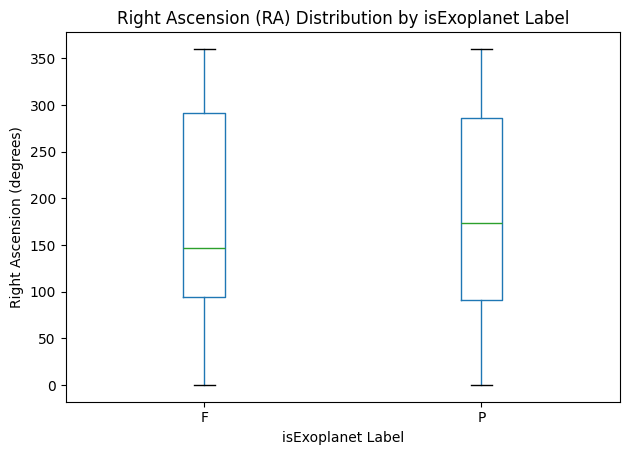

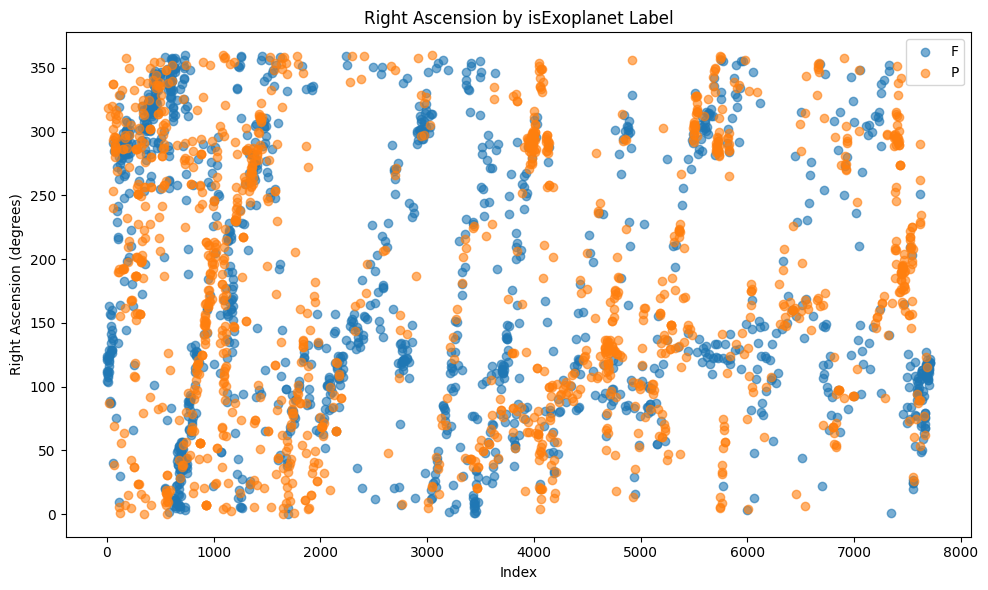

In [36]:
import matplotlib.pyplot as plt

# Create a box plot showing ra distribution for each tfopwg_disp label
plt.figure(figsize=(10, 6))
dataset.boxplot(column='ra', by='isExoplanet', grid=False)
plt.suptitle('')  # Remove the automatic title
plt.title('Right Ascension (RA) Distribution by isExoplanet Label')
plt.xlabel('isExoplanet Label')
plt.ylabel('Right Ascension (degrees)')
plt.tight_layout()
plt.show()

# Alternatively, create a scatter plot
plt.figure(figsize=(10, 6))
for label in dataset['isExoplanet'].unique():
    subset = dataset[dataset['isExoplanet'] == label]
    plt.scatter(subset.index, subset['ra'], label=label, alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Right Ascension (degrees)')
plt.title('Right Ascension by isExoplanet Label')
plt.legend()
plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

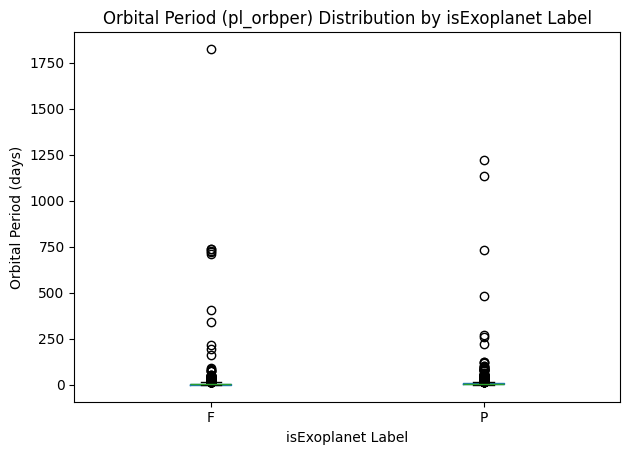

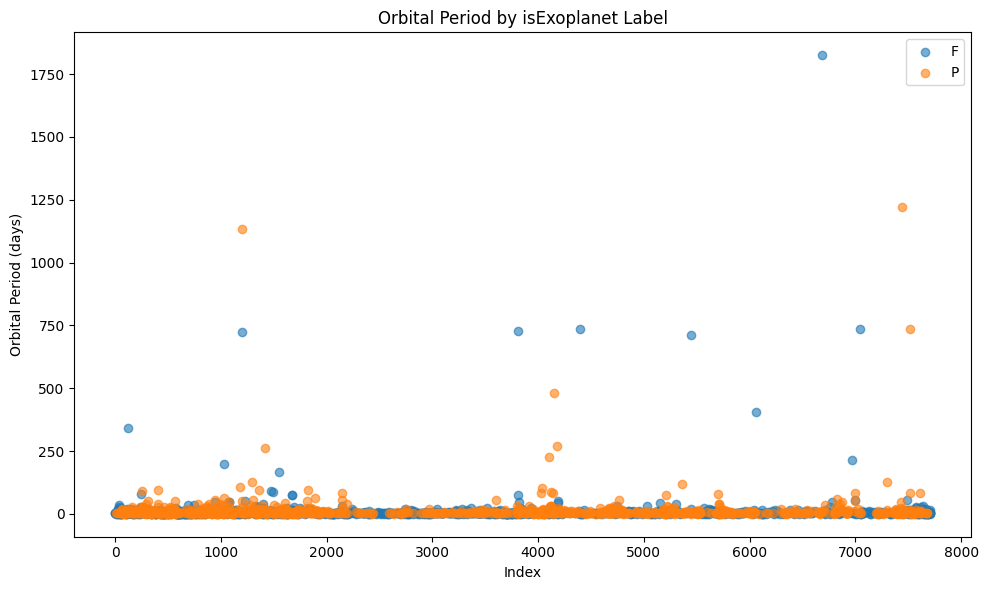

In [39]:
import matplotlib.pyplot as plt

# Create a box plot showing pl_orbper distribution for each tfopwg_disp label
plt.figure(figsize=(10, 6))
dataset.boxplot(column='pl_orbper', by='isExoplanet', grid=False)
plt.suptitle('')  # Remove the automatic title
plt.title('Orbital Period (pl_orbper) Distribution by isExoplanet Label')
plt.xlabel('isExoplanet Label')
plt.ylabel('Orbital Period (days)')
plt.tight_layout()
plt.show()

# Alternatively, create a scatter plot
plt.figure(figsize=(10, 6))
for label in dataset['isExoplanet'].unique():
    subset = dataset[dataset['isExoplanet'] == label]
    plt.scatter(subset.index, subset['pl_orbper'], label=label, alpha=0.6)
plt.xlabel('Index')
plt.ylabel('Orbital Period (days)')
plt.title('Orbital Period by isExoplanet Label')
plt.legend()
plt.tight_layout()
plt.show()